
## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 2: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Tuesday, 24th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Task 1: Logistic Regression on PCA components
In the following code, you have to add a few lines to apply logistic regression to the PCA components. More specifically:
 0. Load the Iris Dataset
 1. Implement Standard Scalar based feature extraction
 2. Implement PCA and use all components and compute the explained variance of each PCA component
 3. Implement PCA and use two components that explain maximum variance. Implement logistic regression model to train and test and give a visual display of the performance by showing a plot of the decision regions along with the test data. Print the test accuracy.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

## Load Iris Dataset and use all four features

df = pd.read_csv(r'Iris.csv', sep=',')

print(df.head())
print("\n\n Mean:",round(df['SepalLengthCm'].mean(),2),round(df['SepalWidthCm'].mean(),2), round(df['PetalLengthCm'].mean(),2),round(df['PetalWidthCm'].mean(),2)) 
print("\n\n Var:",round(df['SepalLengthCm'].var(),2),round(df['SepalWidthCm'].var(),2), round(df['PetalLengthCm'].var(),2),round(df['PetalWidthCm'].var(),2)) 

In [65]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:5].values, df.iloc[:, 5].values

# Covert label values to integer
y = np.where(y == 'Iris-setosa',1,y)
y = np.where(y == 'Iris-versicolor',2,y)
y = np.where(y == 'Iris-virginica',3,y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

### Step1: Standardizing the data.

In [44]:
## Use StandardScalar to scale the features
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#print("\n\n Mean:",round(scaled_df['SepalLengthCm'].mean(),2),round(scaled_df['SepalWidthCm'].mean(),2), round(scaled_df['PetalLengthCm'].mean(),2),round(scaled_df['PetalWidthCm'].mean(),2)) 
#print("\n\n Var:",round(scaled_df['SepalLengthCm'].var(),2),round(scaled_df['SepalWidthCm'].var(),2), round(scaled_df['PetalLengthCm'].var(),2),round(scaled_df['PetalWidthCm'].var(),2)) 

### Step 2-3: Eigendecomposition of the covariance matrix.

In [7]:
## Implement PCA and use all components 
## giving the explained variance of each Principal Component

cov_mat = np.cov(X_combined_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvector \n%s' % eigen_vecs)


Eigenvalues 
[0.02167104 0.15320417 0.91579797 2.93617246]

Eigenvector 
[[ 0.25687221  0.72345392  0.37266439 -0.52129871]
 [-0.12186988 -0.23840069  0.92481845  0.27022895]
 [-0.80050468 -0.1473825   0.0260917  -0.580336  ]
 [ 0.52759516 -0.63091833  0.07177268 -0.56429965]]


[0.7291494946461441, 0.22742316290767497, 0.0380457009880081, 0.005381641458172828]


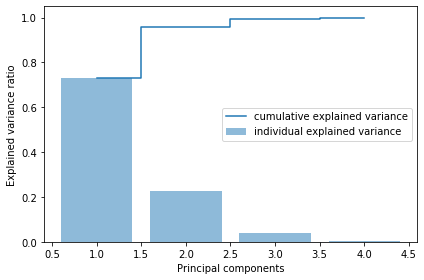

In [9]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 5), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

The above plot says that the first principal component alone captures 70% of the variance. Further the first two combined explain 90% of the variance.

### Steps4-6: Feature Transformation

In [10]:
## Use 2 components that explain maximum variance and perform a 
## ML study using Logistic Regression model

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
#print(eigen_pairs)

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print(eigen_pairs)

# Create the Projection Matrix by choosing only the eigenvectors
# corresponding to the two largest eigenvalues
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W:\n', W)

[(2.9361724616623235, array([-0.52129871,  0.27022895, -0.580336  , -0.56429965])), (0.9157979714403014, array([0.37266439, 0.92481845, 0.0260917 , 0.07177268])), (0.15320416505238152, array([ 0.72345392, -0.23840069, -0.1473825 , -0.63091833])), (0.02167103942888386, array([ 0.25687221, -0.12186988, -0.80050468,  0.52759516]))]
Matrix W:
 [[-0.52129871  0.72345392]
 [ 0.27022895 -0.23840069]
 [-0.580336   -0.1473825 ]
 [-0.56429965 -0.63091833]]


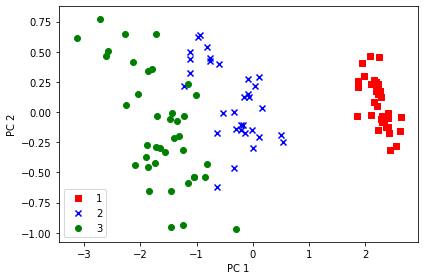

In [11]:
X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('pca-raschka.png', dpi=300)
plt.show()

In [12]:
from matplotlib.colors import ListedColormap
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


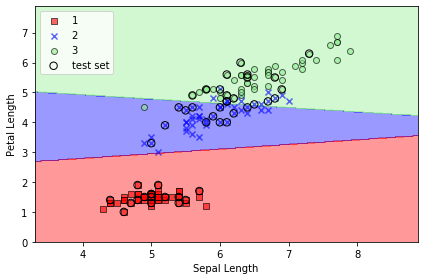

Misclassified samples: 6
Accuracy: 0.87


In [77]:
# Case 1

from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.svm import SVC

X_Case1, y_Case1 = df.iloc[:, np.r_[1, 3]].values, df.iloc[:, 5].values

y_Case1 = np.where(y_Case1 == 'Iris-setosa',1,y_Case1)
y_Case1 = np.where(y_Case1 == 'Iris-versicolor',2,y_Case1)
y_Case1 = np.where(y_Case1 == 'Iris-virginica',3,y_Case1)
y_Case1=y_Case1.astype('int')

X_train_Case1, X_test_Case1, y_train_Case1, y_test_Case1 = \
    train_test_split(X_Case1, y_Case1, test_size=0.3, random_state=0)

X_combined_Case1 = np.vstack((X_train_Case1, X_test_Case1))
#X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined_Case1 = np.hstack((y_train_Case1, y_test_Case1))

lr = LogisticRegression(C=1, random_state=0, solver='lbfgs',multi_class='ovr')
#lr = LogisticRegression(C=1e6, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_Case1, y_train_Case1)

plot_decision_regions(X=X_combined_Case1, y=y_combined_Case1,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

y_pred = lr.predict(X_test_Case1)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

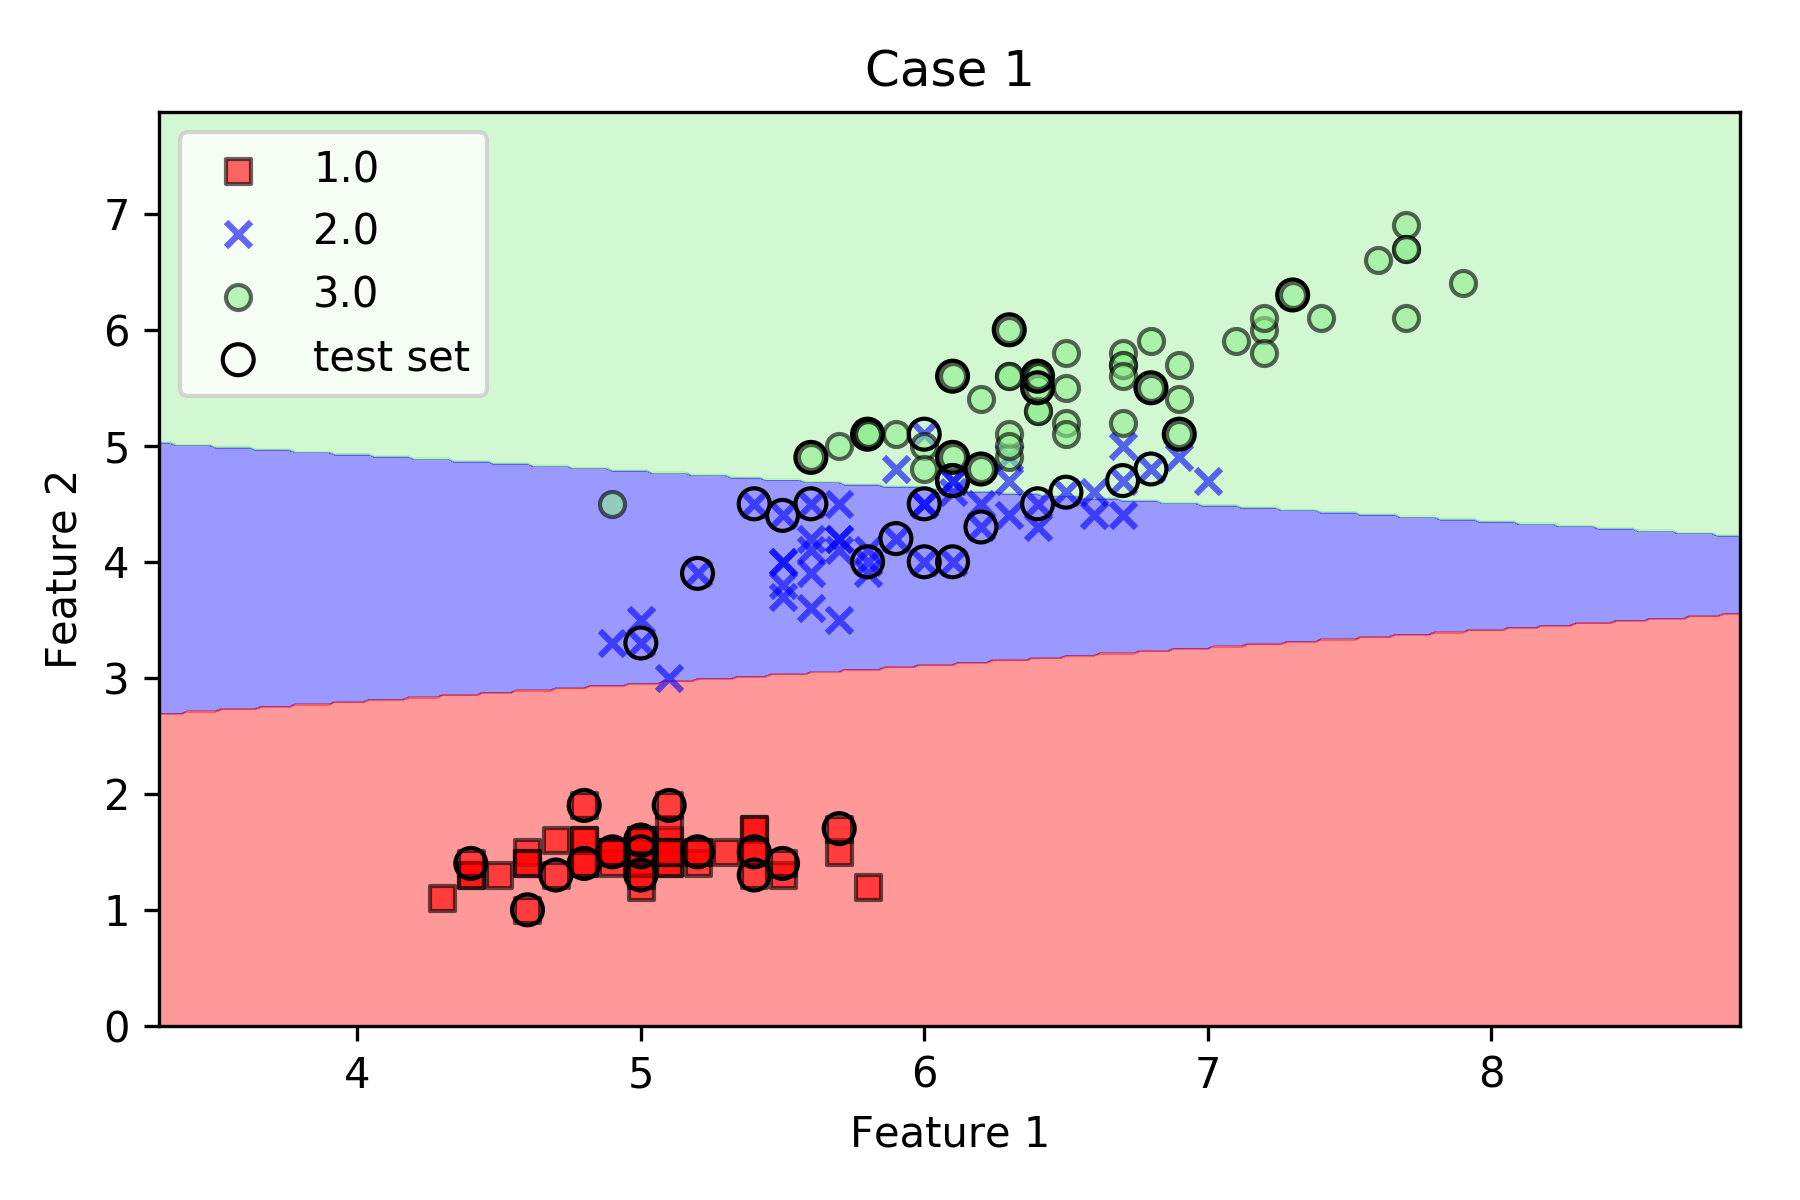

In [192]:
from IPython.display import Image
Image(filename=r'iris-task-1-case-1.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


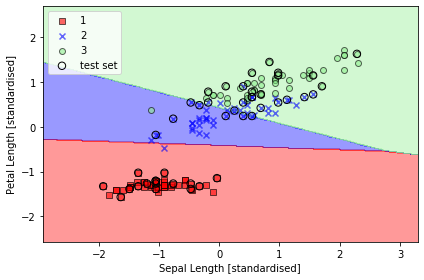

Misclassified samples: 12
Accuracy: 0.73


In [109]:
# Case 2

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_std_Case2 = scaler.fit_transform(X_train_Case1)
X_test_std_Case2 = scaler.fit_transform(X_test_Case1)
X_combined_std_Case2 = np.vstack((X_train_std_Case2, X_test_std_Case2))
y_combined_Case1 = np.hstack((y_train_Case1, y_test_Case1))

lr = LogisticRegression(C=1, random_state=0, solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std_Case2, y_train_Case1)

plot_decision_regions(X=X_combined_std_Case2, y=y_combined_Case1,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Sepal Length [standardised]')
plt.ylabel('Petal Length [standardised]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

y_pred = lr.predict(X_test_std_Case2)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

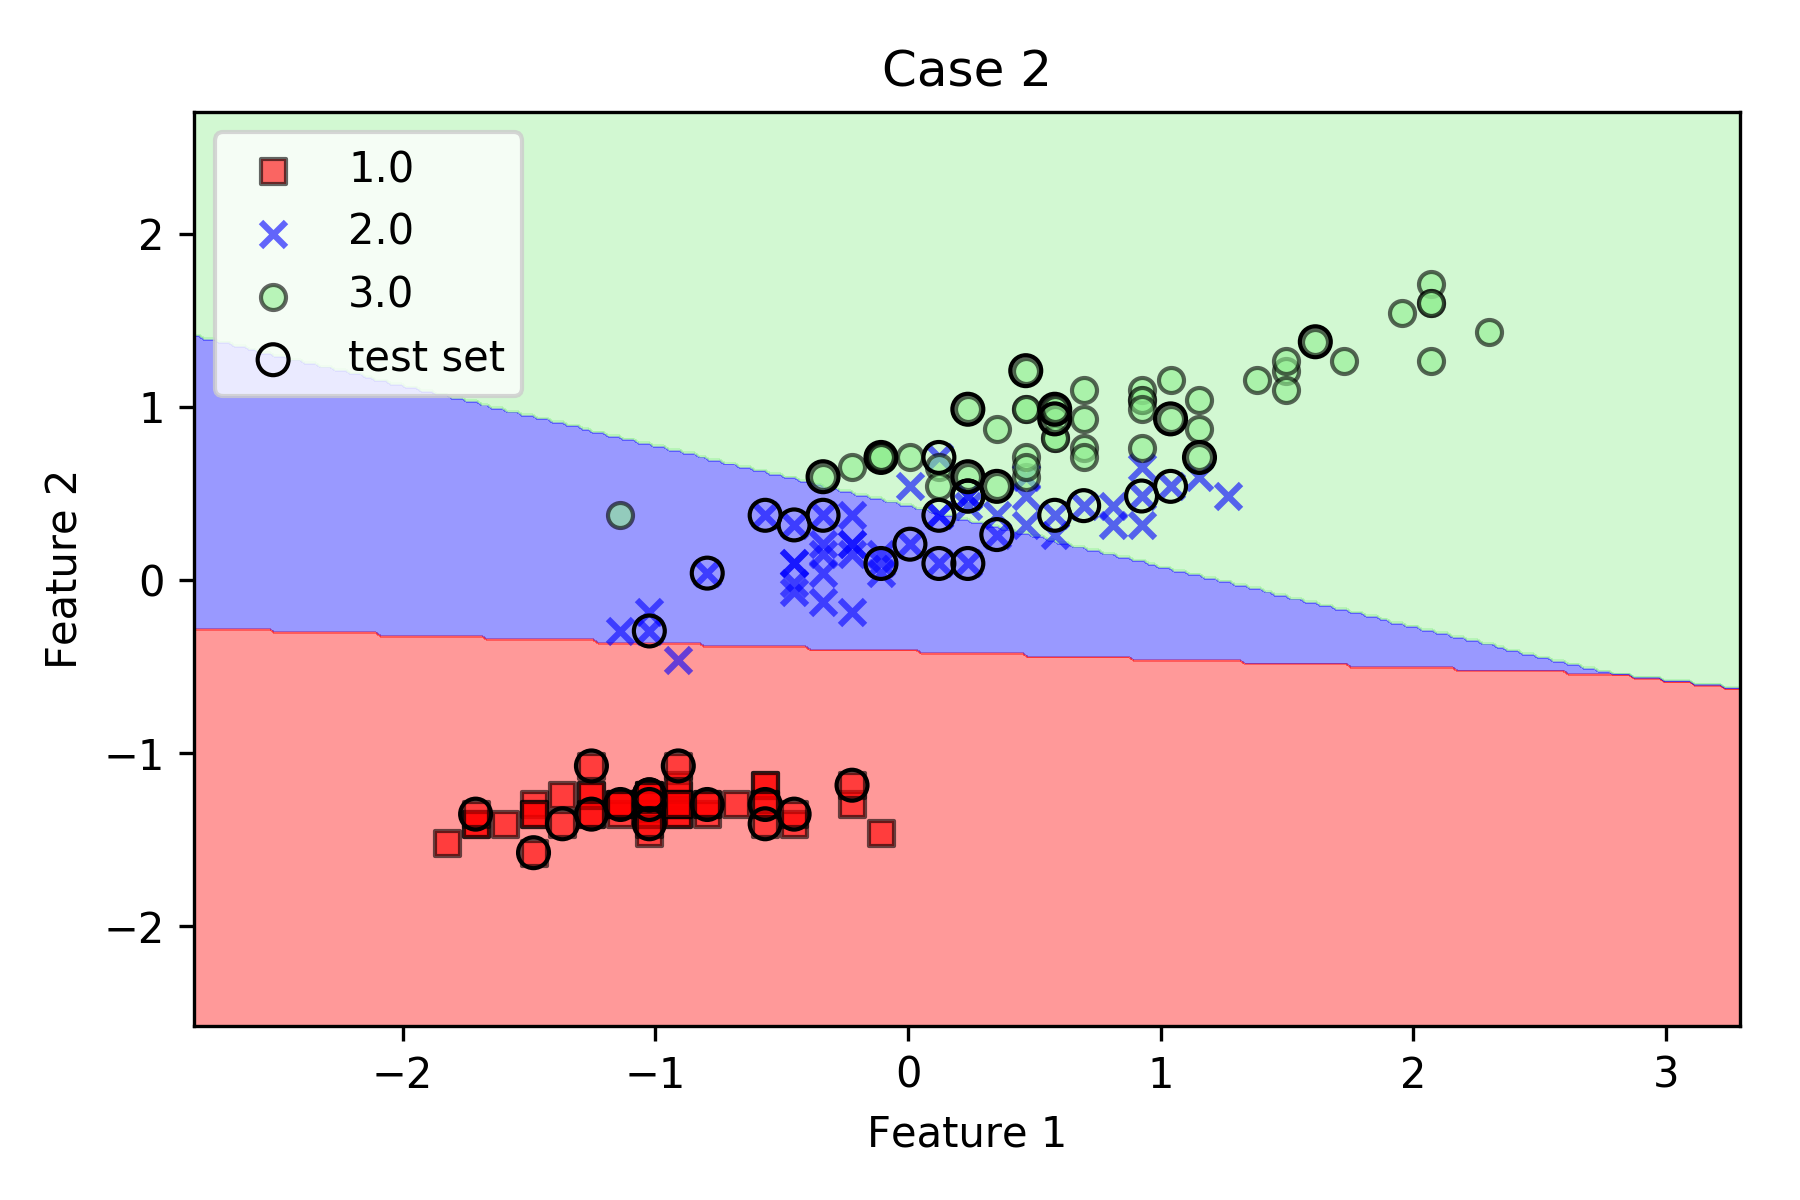

In [2]:
from IPython.display import Image
Image(filename=r'iris-task-1-case-2.png')

In [14]:
# Case 3

from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


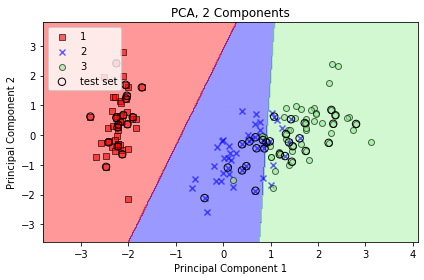

[0.71803699 0.24442718]
Misclassified samples: 6
Accuracy: 0.87


In [78]:
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

X_PCA_Combined = np.vstack((X_train_pca, X_test_pca))

#X_PCA_Combined = np.vstack((X_train_pca, X_test_pca))
#X_PCA_Combined[:,[0,1]] = X_PCA_Combined[:,[1,0]]
#X_train_pca[:,[0,1]] = X_train_pca[:,[1,0]]
#X_test_pca[:,[0,1]] = X_test_pca[:,[1,0]]

lr = LogisticRegression(C=1, random_state=0, solver='lbfgs',multi_class='multinomial')
lr.fit(X_train_pca, y_train_Case1)

plot_decision_regions(X=X_PCA_Combined, y=y_combined_Case1,
                      classifier=lr, test_idx=range(105, 150))
plt.title('PCA, 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_)

y_pred = lr.predict(X_test_pca)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

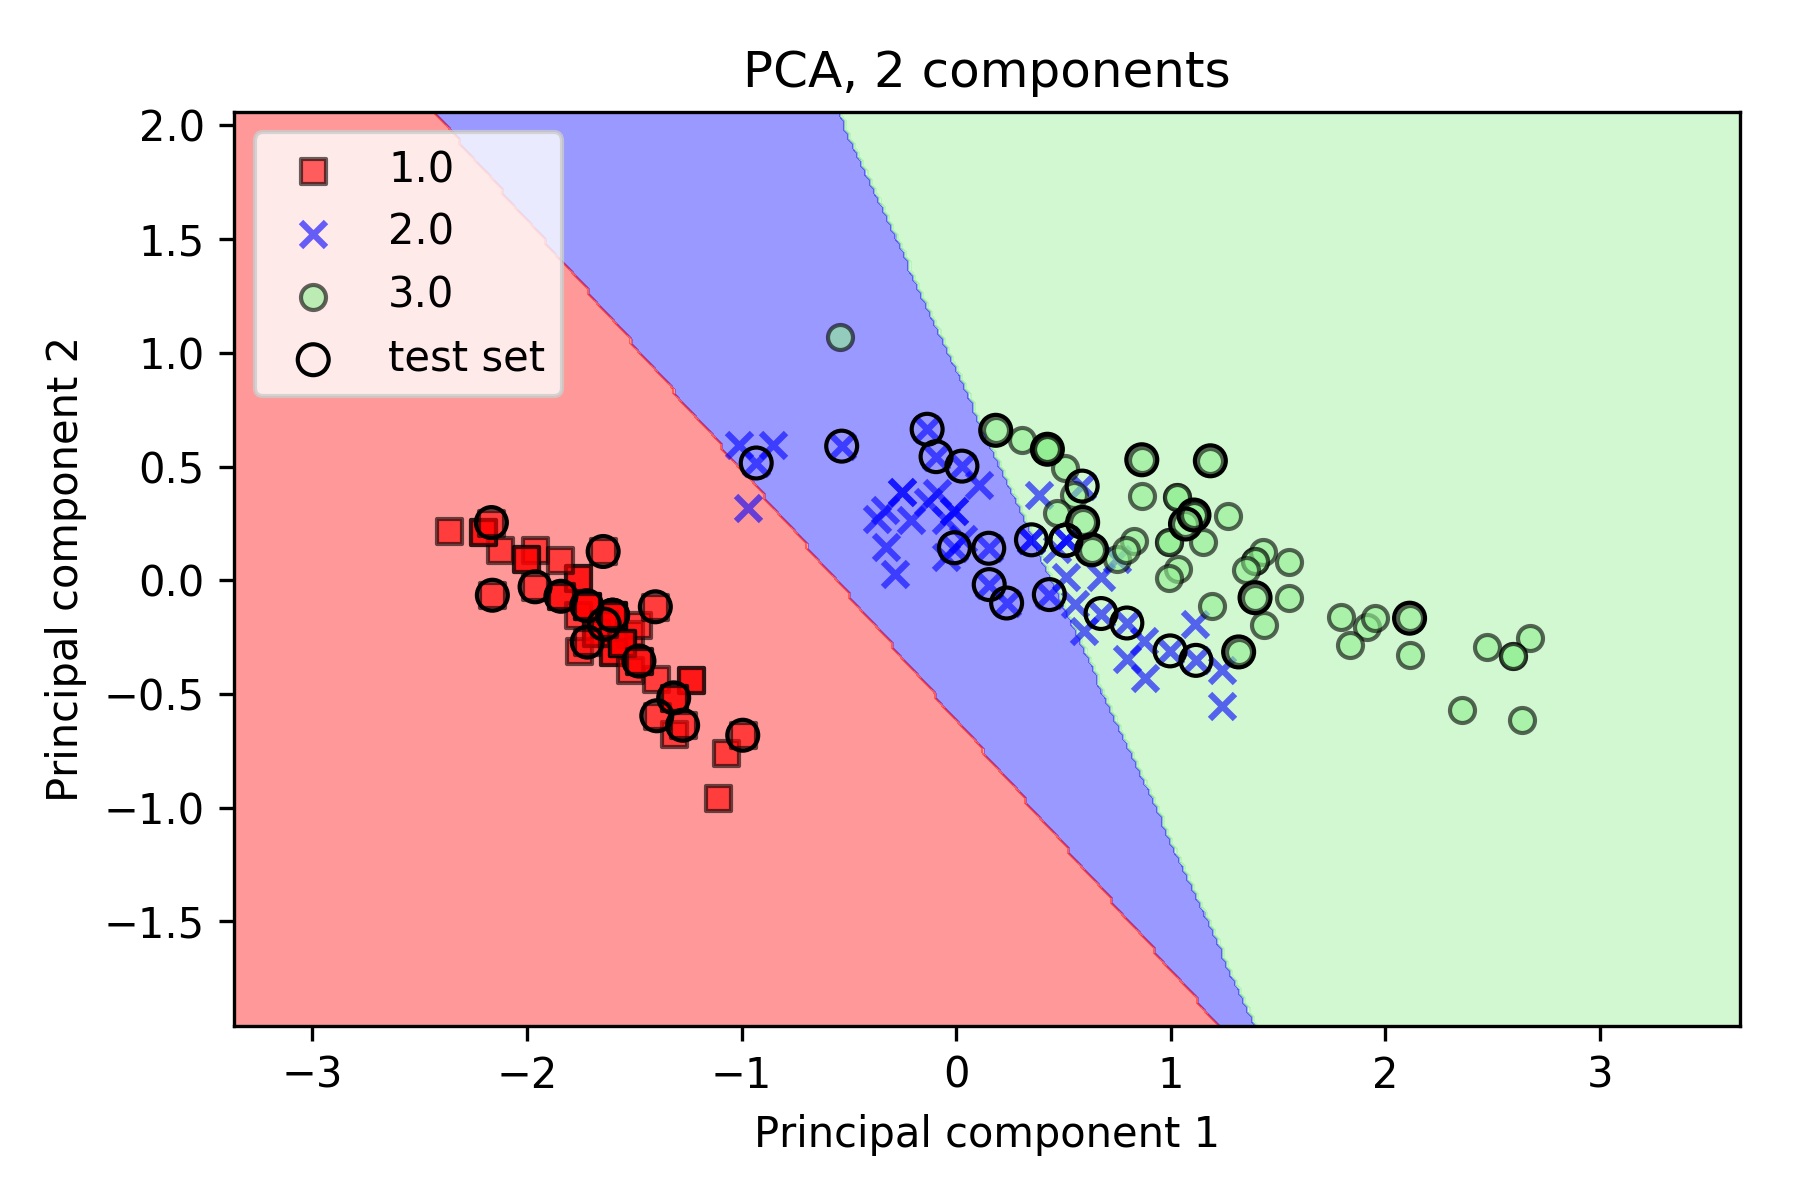

In [3]:
from IPython.display import Image
Image(filename=r'iris-task-1-case-3.png')

# Explanation

**Case 1**: Logistic Regression without standardized data   
        Misclassified samples: 6   
        Accuracy: 0.87  

**Case 2**: Logistic Regression with standardized data  
        Misclassified samples: 12  
        Accuracy: 0.73  
        
**Case 3**: Logistic Regression with PCA values   
        Principal Component 1 captures 72% of the variance in data & combined both the principal components capture         96% of the variance in data.  
        Misclassified samples: 6  
        Accuracy: 0.87    
        
ML models with PCA selected features and non-standardized data have the same prediction accuracy.

# Task 2 

In this exercise, we will take two features iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plot (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation. 

However, you are free to use any combination of two features out of 4 features given in this dataset. 


In [157]:
# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
from sklearn import linear_model
X, y = df.iloc[0:150, np.r_[1, 3]].values, df.iloc[0:150, 5].values

# Covert label values to integer
y = np.where(y == 'Iris-setosa',1,y)
y = np.where(y == 'Iris-versicolor',2,y)
y = np.where(y == 'Iris-virginica',3,y)

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X_std = scaler.fit_transform(X)

X_train_std, X_test_std, y_train, y_test = \
    train_test_split(X_std, y, test_size=0.3, random_state=0)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

ada = AdalineGD(n_iter=15,eta=0.001, debug=True)
ada.fit(X_train_std,y_train.astype(float))
# Step3: Use the model to predict the test data
y_pred = ada.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

Initial Weights: [0. 0. 0.]
New Weights: [0.215      0.08600899 0.0937071 ]
Cost: 256.5
New Weights: [0.40648674 0.15109937 0.16759244]
Cost: 198.4524222187914
New Weights: [0.57714492 0.1998773  0.22603117]
Cost: 155.18517628566084
New Weights: [0.72932978 0.23594949 0.27244432]
Cost: 122.50416151478655
New Weights: [0.86511204 0.26213893 0.30950526]
Cost: 97.53193976506007
New Weights: [0.98631587 0.28065418 0.33930174]
Cost: 78.26056912477297
New Weights: [1.09455115 0.29322219 0.36346285]
Cost: 63.264489410660055
New Weights: [1.19124093 0.30119247 0.3832587 ]
Cost: 51.51434194284019
New Weights: [1.27764495 0.30561885 0.39967846]
Cost: 42.254830706217746
New Weights: [1.35487986 0.30732357 0.41349163]
Cost: 34.923521564749045
New Weights: [1.4239366  0.30694759 0.42529598]
Cost: 29.096048254115107
New Weights: [1.48569551 0.30498994 0.43555515]
Cost: 24.44853543839568
New Weights: [1.54093936 0.30183868 0.44462808]
Cost: 20.731387874136413
New Weights: [1.59036478 0.2977951  0.452

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


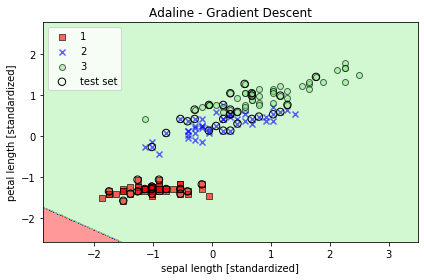

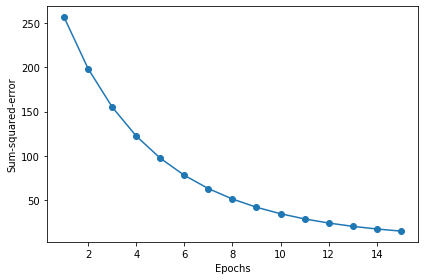

In [158]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ada,test_idx=range(105, 150))
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./adalineGD.png', dpi=300)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

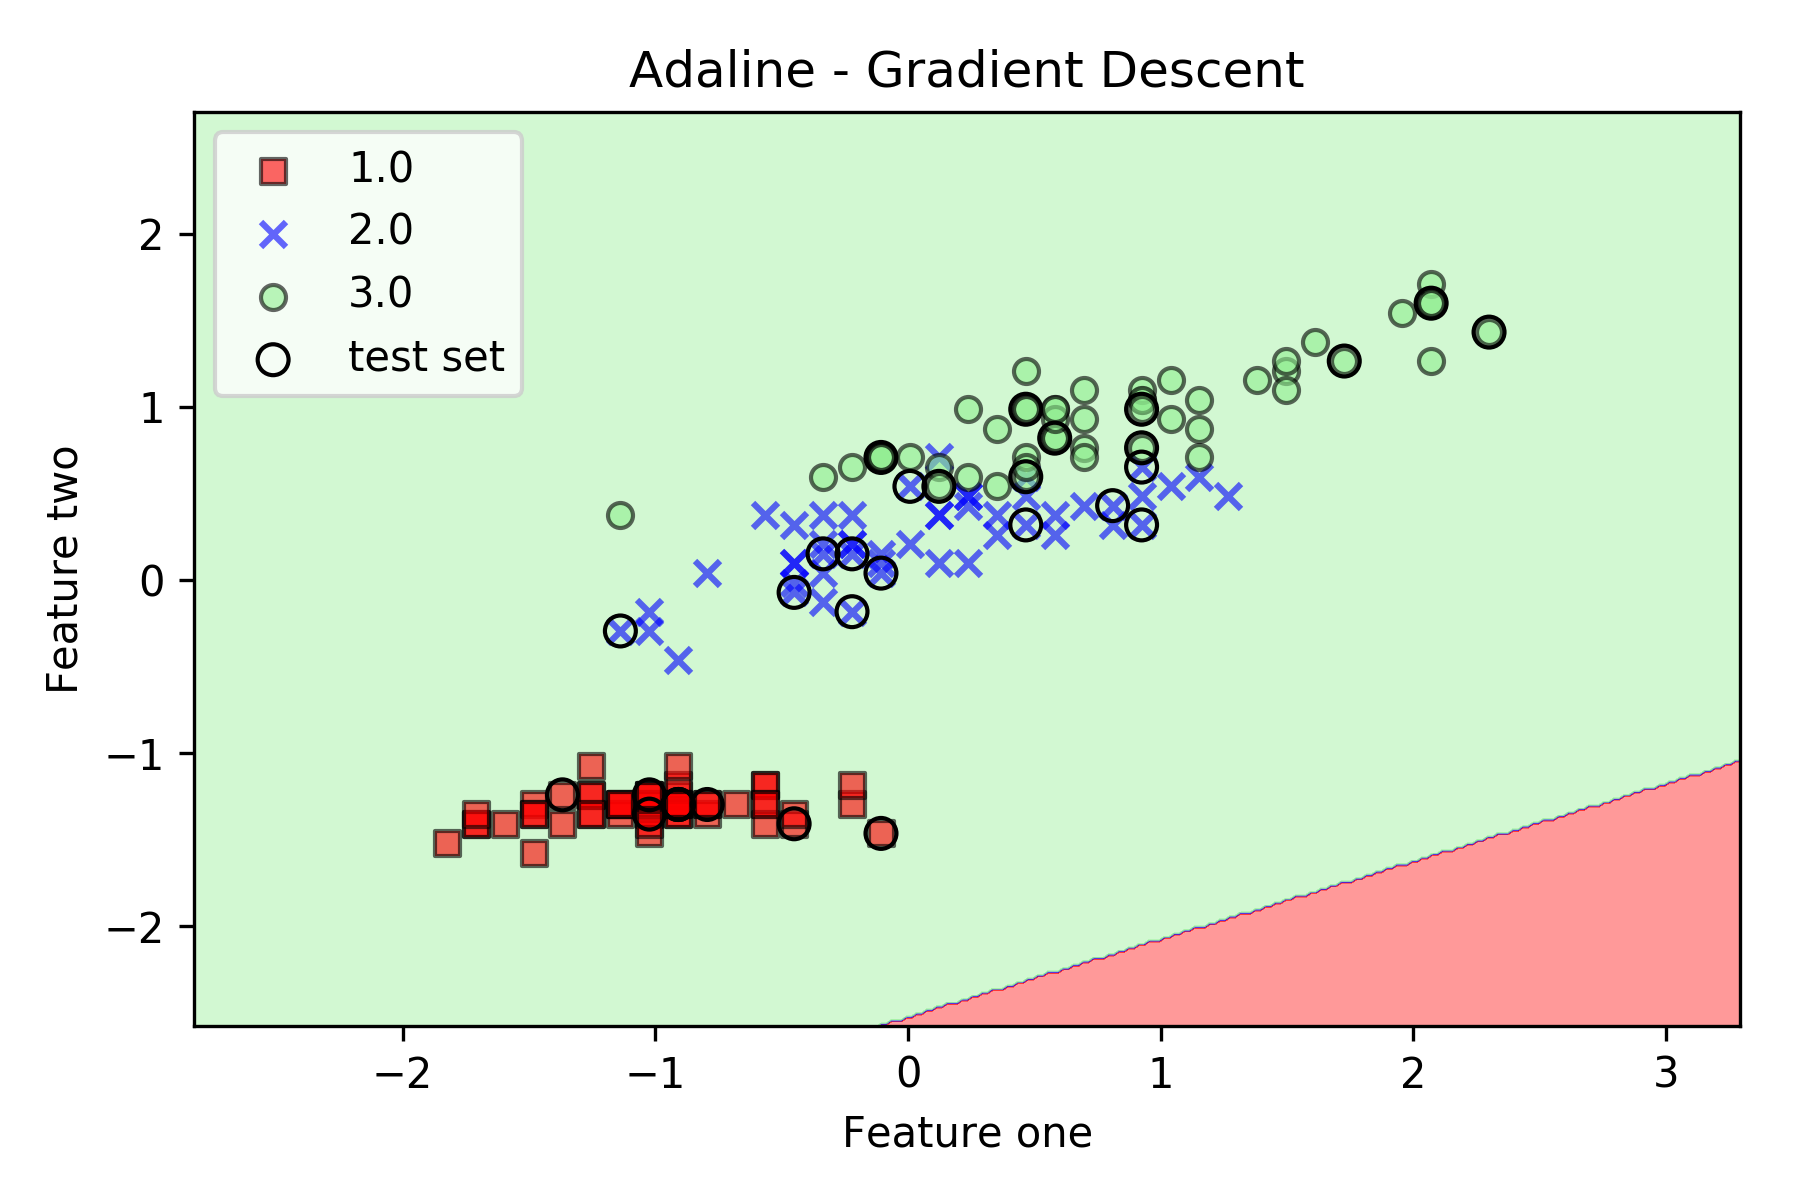

In [4]:
from IPython.display import Image
Image(filename=r'iris-task-2-adaline.png')

In [159]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

adasgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
adasgd.fit(X_train_std,y_train.astype(float))
y_pred = adasgd.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

Misclassified samples: 29
Accuracy: 0.36


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


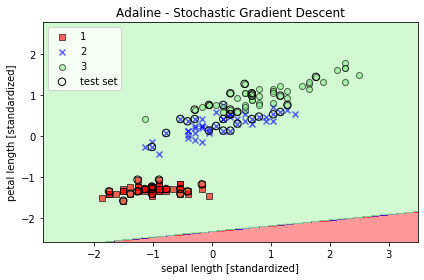

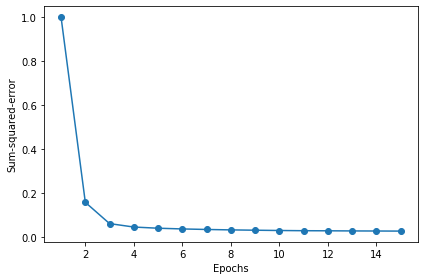

In [161]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=adasgd,test_idx=range(105, 150))
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./adalineGD.png', dpi=300)
plt.show()
plt.plot(range(1, len(adasgd.cost_) + 1), adasgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

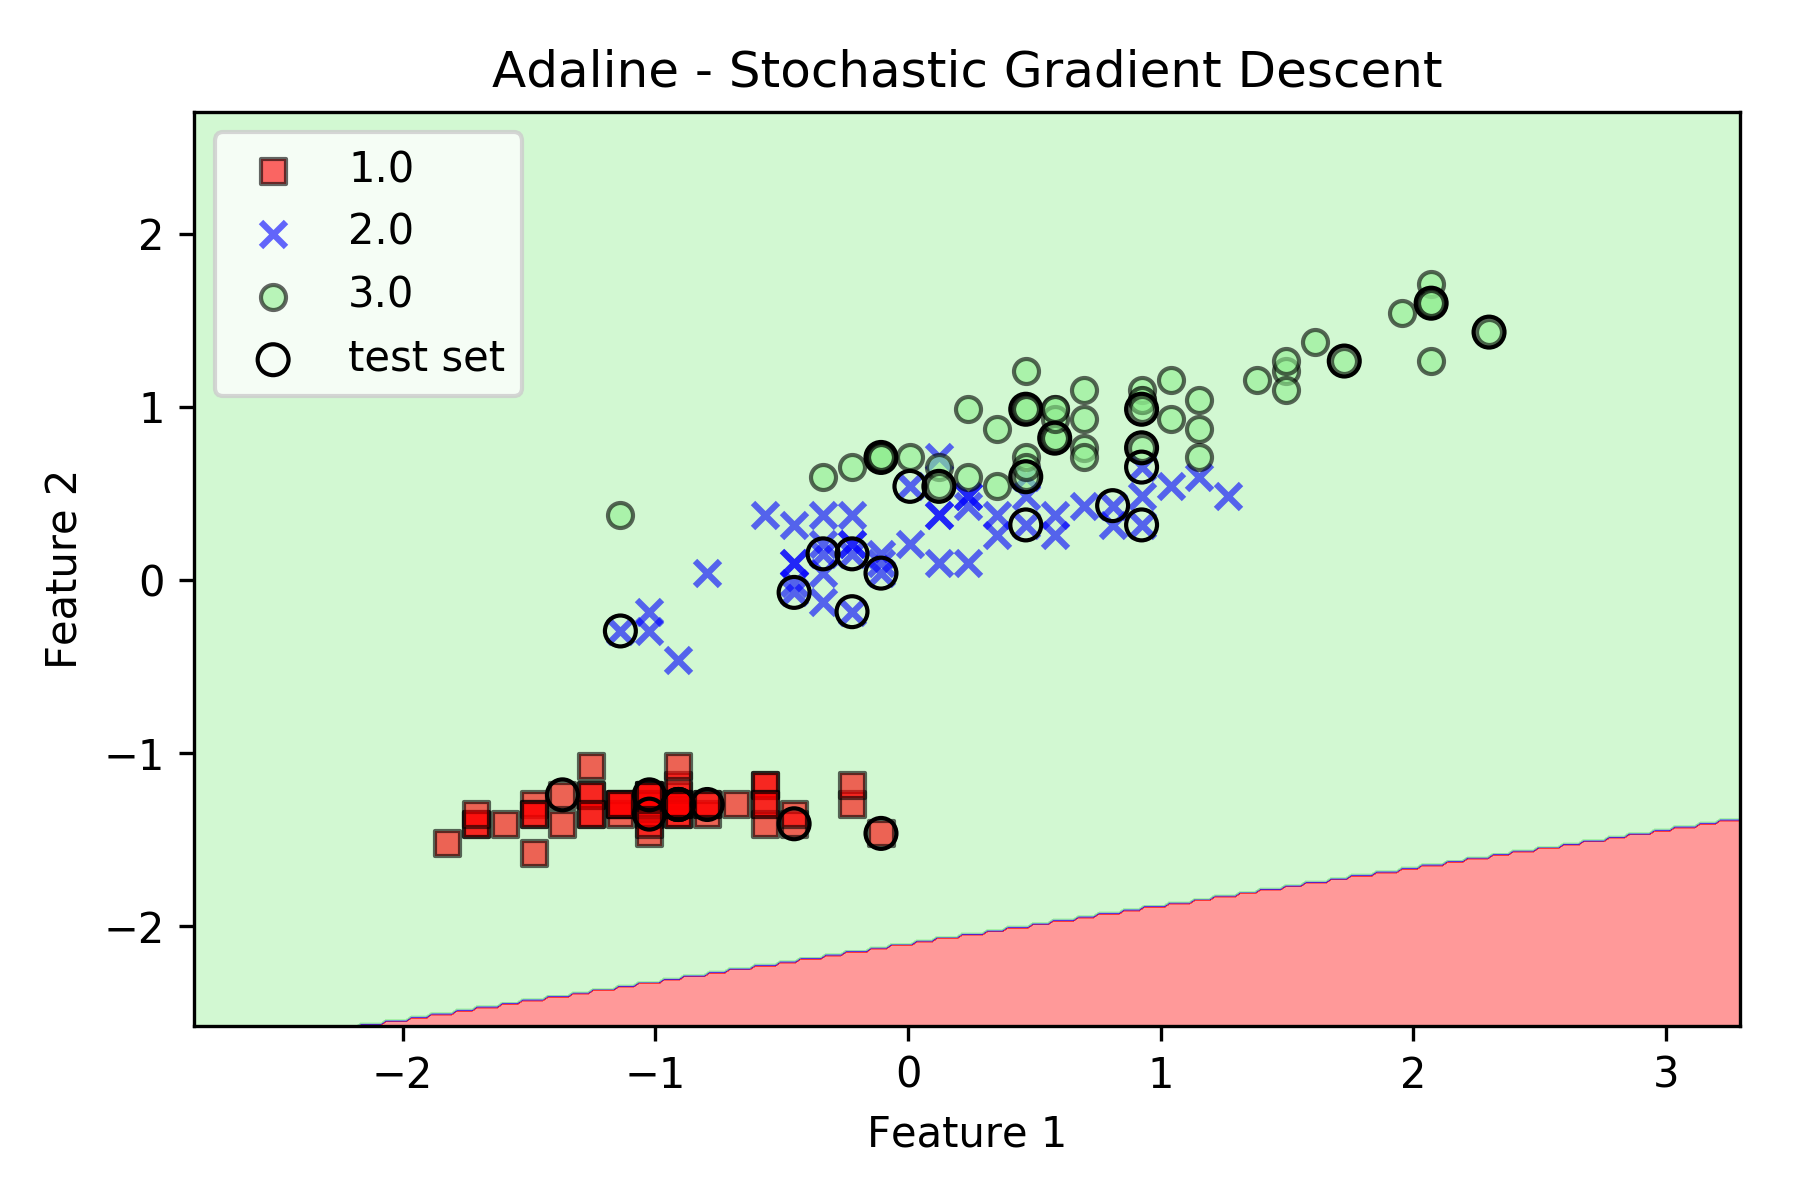

In [6]:
from IPython.display import Image
Image(filename=r'task-2-adalineSGD.png')

In [181]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train.astype(float))
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int), y_pred))

Misclassified samples: 9
Accuracy: 0.80


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


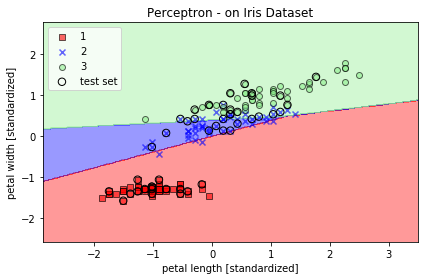

In [187]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

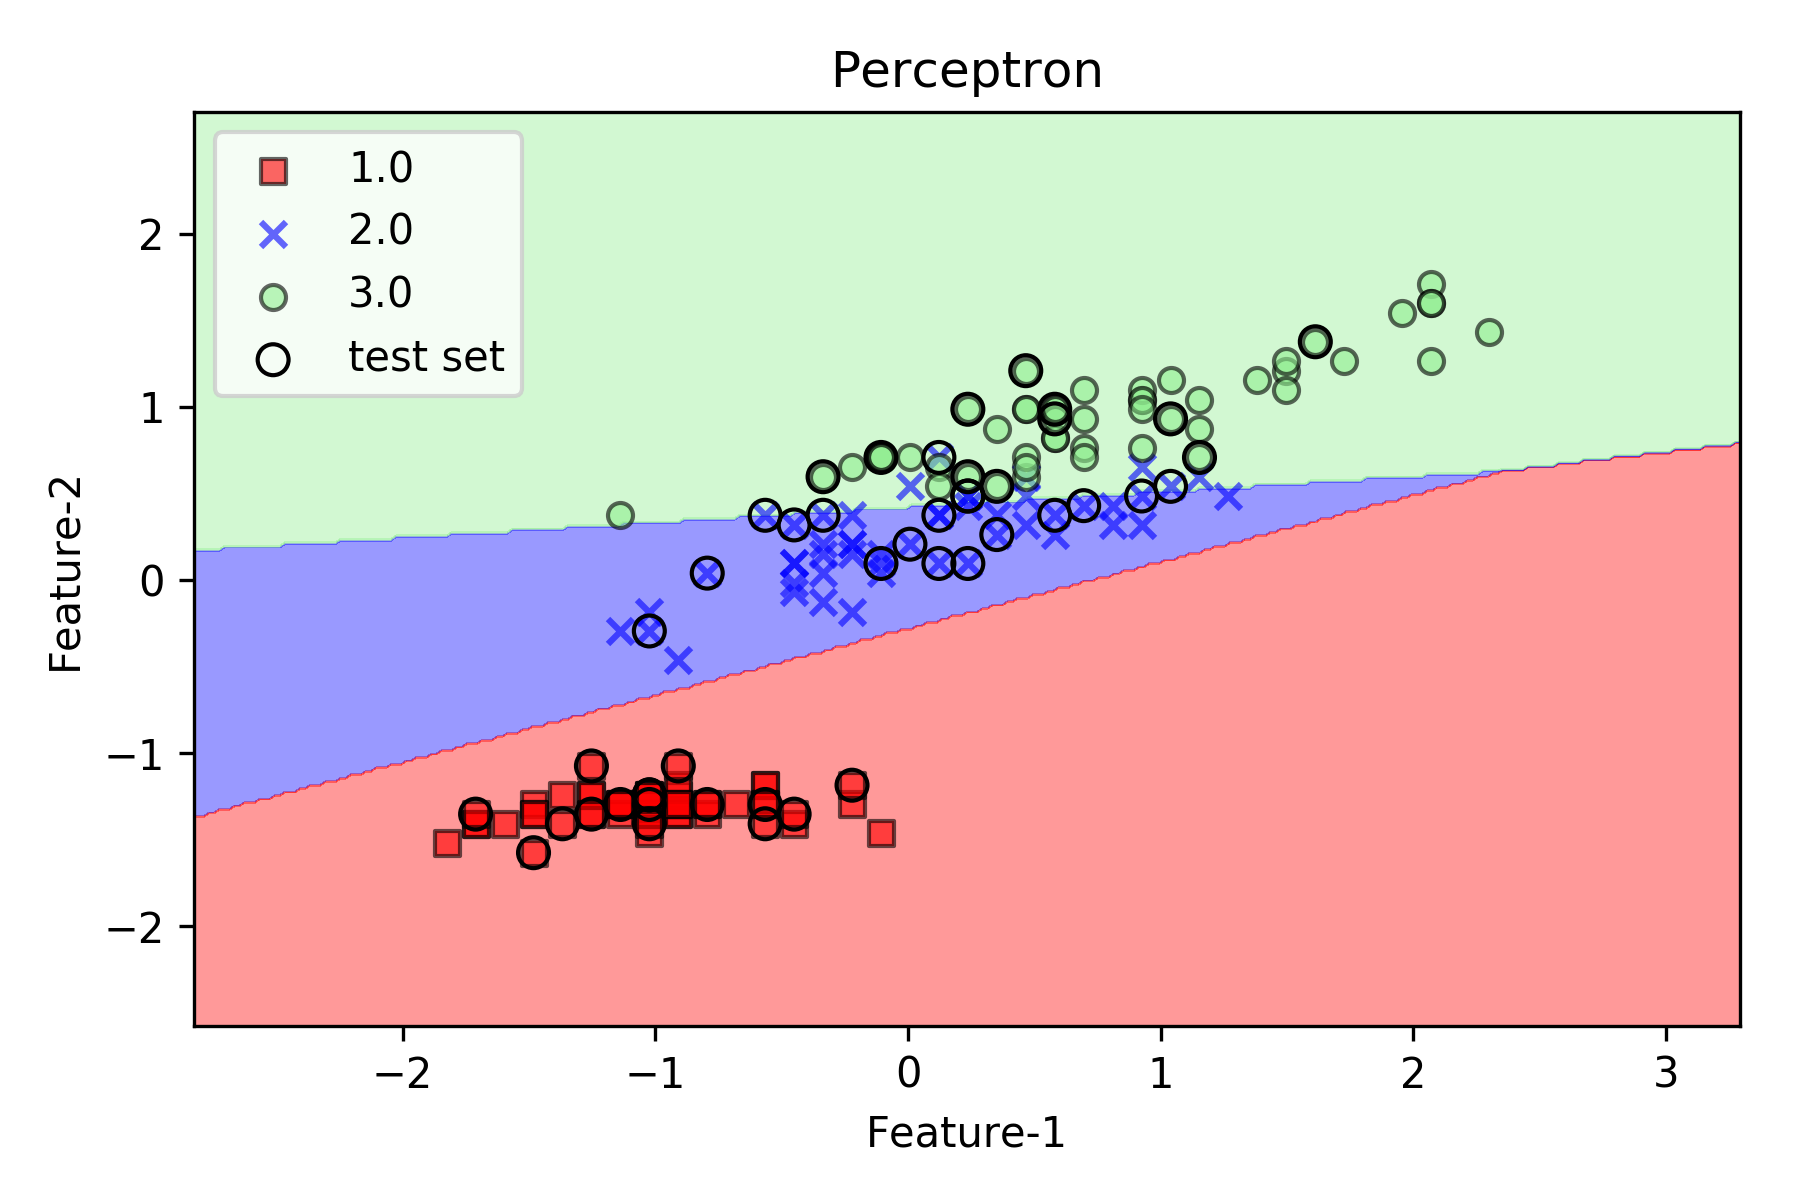

In [7]:
from IPython.display import Image
Image(filename=r'iris-task-2-perceptron.png')

In [177]:
# Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
pp = Perceptron(n_iter=10, eta=0.01, random_seed=1)
pp.fit(X_train_std,y_train.astype(float))
y_pred = pp.predict(X_test_std)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test.astype(int),y_pred))

Misclassified samples: 33
Accuracy: 0.27


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


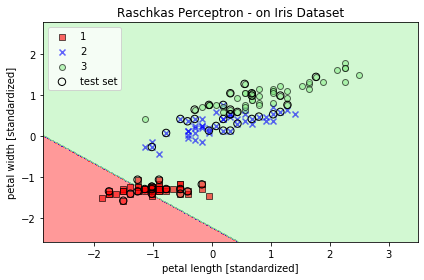

In [208]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=pp, test_idx=range(105, 150))
plt.title('Raschkas Perceptron - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

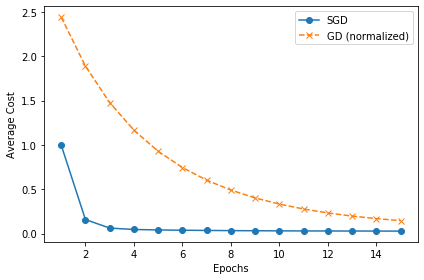

In [209]:
plt.plot(range(1, len(adasgd.cost_) + 1), adasgd.cost_, 
         marker='o', label='SGD')
plt.plot(range(1, len(ada.cost_) + 1), np.array(ada.cost_) / len(y_train), 
         marker='x', linestyle='--', label='GD (normalized)')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.legend(loc='upper right')

plt.tight_layout()
#plt.savefig('./output/fig-adaline-sgd-cost.png', dpi=300)
plt.show()

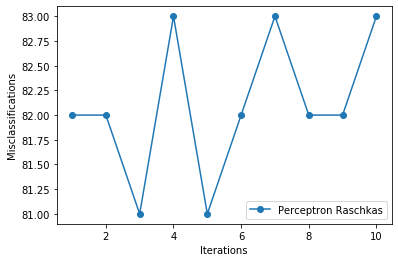

In [196]:
plt.plot(range(1, len(pp.errors_)+1), pp.errors_, marker='o', label='Perceptron Raschkas')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.legend(loc='lower right')
plt.show()

# Performance Comparison
 
Case 1: Adaline Gradient Descent  
Misclassified samples: 29  
Accuracy: 0.36

Case 2: Adaline Stochastic Gradient Descent  
Misclassified samples: 29
Accuracy: 0.36

**Althought the accuracy of Adaline GD & Adaline SGD is the same, the average cost goes down pretty quickly (after 2 iterations) in Adaline SGD vs Adaline GD (apprx 14 iterations).**

Case 3: Scikit Perceptron  
Misclassified samples: 9  
Accuracy: 0.80

Case 4:Raschka's Perceptron  
Misclassified samples: 33
Accuracy: 0.27

**We can compare the performance of Scikit Perceptron & Raschka's Perceptron using accuracy score. Scikit Perceptron performs better than Raschka's Perceptron with an accuracy score of 80% vs 27%**

Out of all the models Sckit Perceptron gives the best performance with an accuracy score of 80%.
Worst performing model is the Raschka's Perceptron since it has the highest number of misclassified samples and it takes forever to converge to the optimal weights.

## Task 3 Explore parameter tuning in Scikit Logistic regression

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

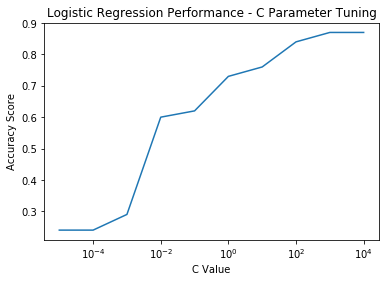

In [244]:
accuracy = []
C_Value = []

for c in np.arange(-5, 5, dtype=float):
    lr = LogisticRegression(C=10**c, random_state=0,solver='lbfgs',multi_class='ovr')
    lr.fit(X_train_std_Case2, y_train_Case1)
    y_pred = lr.predict(X_test_std_Case2)
    accuracy.append(round(accuracy_score(y_test_Case1.astype(int),y_pred),2))
    C_Value.append(10**c)
    
plt.plot(C_Value, accuracy)
plt.title('Logistic Regression Performance - C Parameter Tuning')
plt.xlabel('C Value')
plt.ylabel('Accuracy Score')
plt.xscale('log')
plt.show()

## Observation
Higher the value of parameter C, better the accuracy score.

Reasoning:
C value is inversely proportional to regularization strength. At smaller values of C there is more overfitting which negatively impacts prediction accuracy.


## Task 4 Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

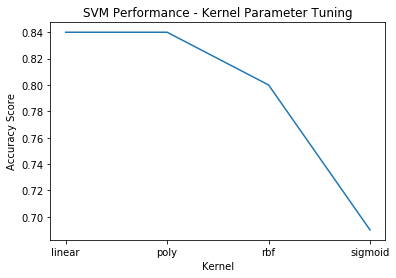

In [248]:
accuracy = []
Kernel = ['linear','poly', 'rbf','sigmoid']

for c in Kernel:
    svm = SVC(kernel=c, C=1.0, random_state=0)
    svm.fit(X_train_std_Case2, y_train_Case1)
    y_pred = svm.predict(X_test_std_Case2)
    accuracy.append(round(accuracy_score(y_test_Case1.astype(int),y_pred),2))
    
plt.plot(Kernel, accuracy)
plt.title('SVM Performance - Kernel Parameter Tuning')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')
plt.show()

## Observation
Sigmoid kernel performs the worst since sigmoid function returns two values, 0 and 1. Therefore it is more suitable for binary classification problems. However, for Iris dataset we had three output classes.

Linear and Poylnomial kernel give optimal performance for standardized Iris dataset. 